# Simulation TP2

## Aloha pur

- Infinité de sources
- Débit d'arrivée $\lambda$
- Toutes les trans sont de même taille (durée d'émission T)
- Hypothèses : en cas de collision toutes les trans sont inexploitable

Méthode Aloha pur

- Pas d'écoute du support
- On néglige les erreurs
- A la fin de la transmission la station sait s'il y a collision
- En cas de collision il y a une attente d

$\Lambda = \gamma P_{succès} = \gamma e^{-2 \gamma T}$

$G = \gamma T = \rho_0$ charge offerte

$\rho_s = \Lambda T$

Charge offerte de 0.5 => max 0.18


In [20]:
import numpy as np
import matplotlib.pyplot as plt

```tcl
Mac/Sat/UnslottedAloha set mean_backoff_ 1s ; # mean exponential backoff time(s) TODO:
Mac/Sat/UnslottedAloha set rtx_limit_ 3; # max number of retrans. attempted  TODO:
Mac/Sat/UnslottedAloha set send_timeout_ 270ms; # resend if send times out TODO: ici ?

set opt(qlim)		50		; #TODO:

$exp($a) set idle_time_ variable
```


Text(0, 0.5, '$\\rho_s$')

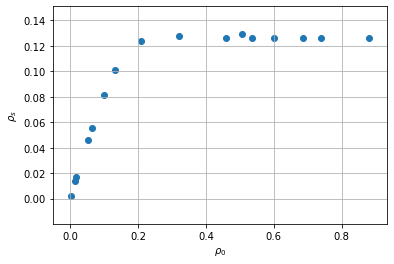

In [21]:
rho_0 = np.array([
    0.0174910388529732,
    0.0143781480977282,
    0.00179082786252704,
    0.207962751292275,
    0.460490191274399,
    0.534845334845335,
    0.505927647421179,
    0.737783351133405,
    0.881003924015696,
    0.133100395807125,
    0.100472238723575,
    0.063966063966064,
    0.0517743005291238,
    0.322011074188261,
    0.686672580053221,
    0.599944798454357,
])

rho_s = np.array([
    0.0168189528259617,
    0.0139493261369187,
    0.00177401257743289,
    0.123591548239417,
    0.125944096714224,
    0.126411726411726,
    0.129512236097889,
    0.125849303397214,
    0.126210504842019,
    0.100936216851903,
    0.0812598633087913,
    0.0553308553308553,
    0.0460346726665379,
    0.12740496588442,
    0.126076734690612,
    0.126011928333993,
])

plt.scatter(rho_0, rho_s)
plt.grid()
plt.xlabel(r'$\rho_0$')
plt.ylabel(r'$\rho_s$')

En faisant varier uniquement la taille max de la file, $\rho_0$ et $\rho_s$ ne varient pas sensiblement 

La modification du temps moyen de backoff exponentiel a un impact conséquent sur les valeurs de charge du système.

Pour 1s

```
99.9999 38496 0.658017537562176 0.476790603232096 5169 0.0812071890906806 0.0831814370432701 585.030585030585 636.720636720637 150.49015049015 0.491425691425691 0.534845334845335 0.126411726411726
time #drop %loss avr_%drop #coll %col avr_%coll thpt_a thpt_o thpt_s rho_a rho_o rho_s
```

Pour 0.1s

```
99.9950 22697 0.480004229671143 0.306791737734342 14058 0.22917413843696 0.225322452609815 472.873643682184 613.460673033652 196.7198359918 0.397213860693035 0.515306965348267 0.165244662233112
time #drop %loss avr_%drop #coll %col avr_%coll thpt_a thpt_o thpt_s rho_a rho_o rho_s
```


Text(0.5, 1.0, 'backoff 0.001s')

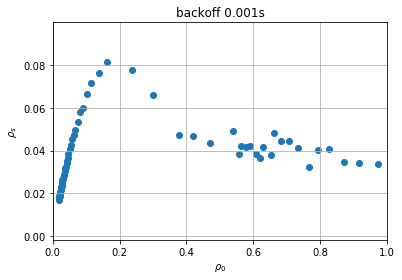

In [30]:
rho_0s = []
rho_ss = []
with open('trace_Loss/res.txt', 'r') as f:
    for l in f:
        rho_0, rho_s = l.split()
        rho_0s.append(float(rho_0))
        rho_ss.append(float(rho_s))
plt.scatter(rho_0s, rho_ss)
plt.grid()
plt.xlabel(r'$\rho_0$')
plt.ylabel(r'$\rho_s$')
plt.xlim(left=0, right=1)
plt.title('backoff 0.001s')
